# Normal Distribution

# Contents

* [Introduction](#Introduction)
* [Bibliography](#Bibliography)

## Introduction

Normal distribution is also known as the Gaussian distribution. It was first discovered by Carl Friedrich Gauss, hence the name. (Chen 2022)

All distributions describe how the values of a variable are distributed.

Normal Distribution describes the distribution of values for many natural phenomena, for example height of adult males in Ireland, IQ scores, etc.

It is a very important probability distribution in statistics. It is a continuous probability distribution that is symmetrical around it's mean. When plotted on a graph it will give you what is commonly known as a __Bell Curve__ (Evans 2017)

Normal Distribution has the following propertise (CFI Team 2022):

* "It is symmeyrical", meaning it can be divided down the middle and each half would be equal.

* It's mean, mode and median are equal

* Empirical rule - The data in a Normally distributed dataset lies at a constant distance from the mean, for example approximately:
    * 68% of the data falls within one standard deviation of the mean
    * 95% of the data falls within two standard deviations of the mean
    * 99% of the data falls within three standard deviations of the mean
    
* Skewness, which measures the symmetry of a distribution in Normal Distribution is zero.
 
* Kurtosis, which measures the size of the 2 tails combined i Normal distribution is equal to 3. If Kurtosis is greater than 3 the dataset has heavier tails and if the kurtosis is less than 3 it's tails are lighter. Excess Kurtosis is calculated by subtracting the kurtosis from 3, thus giving the Normal Distribution an excess Kurtosis of zero.
 
 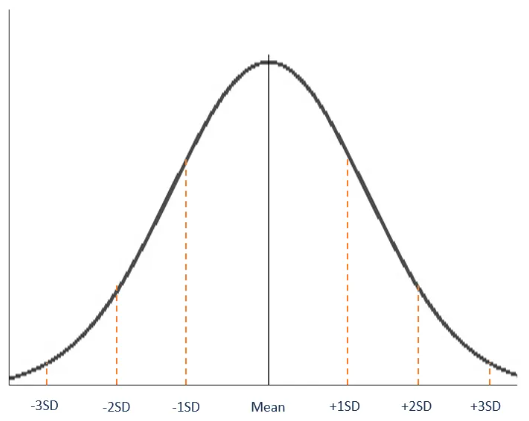
 <center>(CFI Team 2022)</center>

Links to use:

https://onlinestatbook.com/2/normal_distribution/normal_distribution.html

https://www.middlesex.mass.edu/ace/downloads/tipsheets/normal_cf.pdf

https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics#:~:text=So%2C%20a%20normal%20distribution%20will,of%20probability%20in%20the%20tails.

https://www.kaggle.com/code/gadaadhaarigeek/normal-distribution

https://www.analyticsvidhya.com/blog/2021/05/normal-distribution-an-ultimate-guide/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3915399/

https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/

https://archive.ics.uci.edu/ml/index.php

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [38]:
# Normally distributed data from Kaggle
# Ref: https://www.kaggle.com/datasets/tinasoni/normal-distribution-data/discussion?resource=download&select=CompanyABCProfit.csv

df = pd.read_csv('data/CompanyABCProfit.csv')
df

,Year,Profit
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764
...,...,...
195,2016,988
196,2017,895
197,2018,-178
198,2019,543


In [39]:
# Sorting the data based on the profit column
df_sorted = df.sort_values(by=['Profit'])
df_sorted

,Year,Profit
167,1988,-413
105,1926,-244
197,2018,-178
176,1997,26
146,1967,49
...,...,...
58,1879,1973
168,1989,1996
101,1922,2027
157,1978,2045


In [62]:
# Put in a new index column and replace existing index with new sorted index
df_sorted.insert(0, 'New_ID', range(0, len(df)))
df_sorted.set_index('New_ID', inplace=True)
df_sorted

,Year,Profit,bins
New_ID,,,
0,1988,-413,"(-415.468, -166.2]"
1,1926,-244,"(-415.468, -166.2]"
2,2018,-178,"(-415.468, -166.2]"
3,1997,26,"(-166.2, 80.6]"
4,1967,49,"(-166.2, 80.6]"
...,...,...,...
195,1879,1973,"(1808.2, 2055.0]"
196,1989,1996,"(1808.2, 2055.0]"
197,1922,2027,"(1808.2, 2055.0]"


In [63]:
# Put data into bins
# Ref: https://www.statology.org/data-binning-in-python/
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.cut.html

df_sorted['bins'] = pd.cut(df_sorted['Profit'], 10)
df_sorted

,Year,Profit,bins
New_ID,,,
0,1988,-413,"(-415.468, -166.2]"
1,1926,-244,"(-415.468, -166.2]"
2,2018,-178,"(-415.468, -166.2]"
3,1997,26,"(-166.2, 80.6]"
4,1967,49,"(-166.2, 80.6]"
...,...,...,...
195,1879,1973,"(1808.2, 2055.0]"
196,1989,1996,"(1808.2, 2055.0]"
197,1922,2027,"(1808.2, 2055.0]"


In [53]:
# Get a count of the number of values that fall into each bin.
bins = df_sorted['bins'].value_counts()
bins

(821.0, 1067.8]       49
(1067.8, 1314.6]      36
(574.2, 821.0]        29
(1314.6, 1561.4]      21
(1561.4, 1808.2]      18
(327.4, 574.2]        16
(1808.2, 2055.0]      13
(80.6, 327.4]         12
(-415.468, -166.2]     3
(-166.2, 80.6]         3
Name: bins, dtype: int64

In [55]:
# Convert the series to a dataframe
df2 = bins.to_frame()
df2['index1'] = df2.index
df2

,bins,index1
"(821.0, 1067.8]",49,"(821.0, 1067.8]"
"(1067.8, 1314.6]",36,"(1067.8, 1314.6]"
"(574.2, 821.0]",29,"(574.2, 821.0]"
"(1314.6, 1561.4]",21,"(1314.6, 1561.4]"
"(1561.4, 1808.2]",18,"(1561.4, 1808.2]"
"(327.4, 574.2]",16,"(327.4, 574.2]"
"(1808.2, 2055.0]",13,"(1808.2, 2055.0]"
"(80.6, 327.4]",12,"(80.6, 327.4]"
"(-415.468, -166.2]",3,"(-415.468, -166.2]"
"(-166.2, 80.6]",3,"(-166.2, 80.6]"


In [57]:
# Sort the values again, by the bins/buckets
df2_sorted = df2.sort_values(by=['index1'])
df2_sorted

,bins,index1
"(-415.468, -166.2]",3,"(-415.468, -166.2]"
"(-166.2, 80.6]",3,"(-166.2, 80.6]"
"(80.6, 327.4]",12,"(80.6, 327.4]"
"(327.4, 574.2]",16,"(327.4, 574.2]"
"(574.2, 821.0]",29,"(574.2, 821.0]"
"(821.0, 1067.8]",49,"(821.0, 1067.8]"
"(1067.8, 1314.6]",36,"(1067.8, 1314.6]"
"(1314.6, 1561.4]",21,"(1314.6, 1561.4]"
"(1561.4, 1808.2]",18,"(1561.4, 1808.2]"
"(1808.2, 2055.0]",13,"(1808.2, 2055.0]"


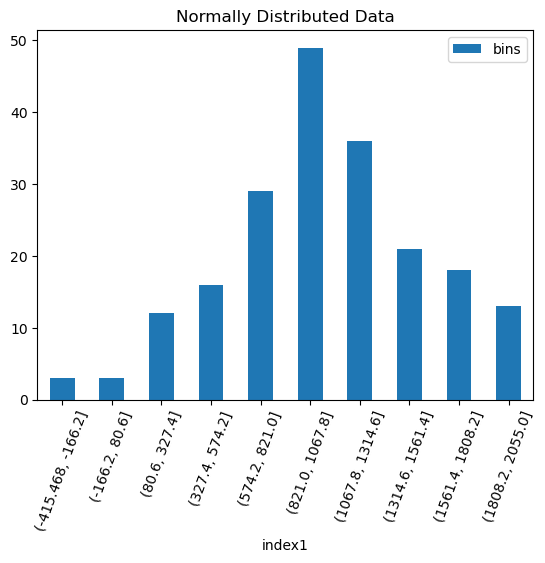

In [59]:
# plot the data (Should be normally distributed)
df2_sorted.plot.bar(x="index1", y="bins", rot=70, title="Normally Distributed Data");

# Bibliography

[Back To Top](#Contents)

CFI Team, (2022). Normal Distribution: Also known as Gaussian or Gauss distribution. Available at: https://corporatefinanceinstitute.com/resources/data-science/normal-distribution/ (Accessed: 08/12/2022)

Chen, J, (2022). Normal Distribution: What It Is, Properties, Uses, and Formula. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp (Accessed: 15 November 2022)

Evans. J.R, (2017). Business Analytics. 2nd Ed. Harlow Essex: Pearson